In [2]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="white",color_codes=True)    

### 读取广告特征和提取出的训练数据和标签

In [3]:
ad_features = pd.read_csv("./datasets/adFeature.csv")
X = pd.read_csv("./datasets/train_data.csv")

In [4]:
X.head()

,Unnamed: 0,aid,uid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,...,interest4,interest5,kw1,kw2,kw3,marriageStatus,os,topic1,topic2,topic3
0,10151,1966,45527592,5552,158101,1116089,35,27,113,9,...,-1,100 72 80 92 71 109 8 50 86 28 6 76 20 46 21 1...,779963 342753 545452 194319 627369,32361 56505 79676 117357 33961,-1,11,1,1794 722 8648 9826 523,9171 755 2392 2209 661,-1
1,2275273,1407,38540916,702,12724,962151,105,10,4669,11,...,-1,80 92 131 78 8 30 115 6 42 46 59 36 64 129,223415 275159 411962 680328 391535,84508 66348 117586 38622 61483,-1,10,1,7262 644 5670 6939 3162,4429 598 3104 9047 8193,-1
2,5015322,1566,27200155,6946,296367,520004,59,24,3794,11,...,-1,-1,27326 580549 189366 100680,32981 95979 45119 108417 48892,-1,10,0,9375 2070 8133 2264 5625,-1,-1
3,5020944,2048,38793319,8203,37818,240336,59,142,0,6,...,-1,-1,315951 755173 555994 274523 225925,117462 55952 76242 103994 42733,-1,10,0,5725 8980 2748 6626 3110,8833 5732 2091 3717 5216,-1
4,4918461,117,60756767,702,18552,619519,53,24,5615,11,...,-1,100 72 92 131 37 116 78 4 79 8 30 28 6 39 75 8...,361407 471398 118076 338851 619562,93916 8546 36764 766 18185,-1,11,1,6939 7895 644 5297 4149,5115 969 5835 6850 417,-1


### 提取数据执行函数to_csv时忘了加入index=False, 导致第一列出现Unnamed要去除

In [5]:
X.drop(X.columns[[0]], axis=1, inplace=True)  #删除某列函数

In [6]:
X.head()

,aid,uid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,LBS,...,interest4,interest5,kw1,kw2,kw3,marriageStatus,os,topic1,topic2,topic3
0,1966,45527592,5552,158101,1116089,35,27,113,9,711.0,...,-1,100 72 80 92 71 109 8 50 86 28 6 76 20 46 21 1...,779963 342753 545452 194319 627369,32361 56505 79676 117357 33961,-1,11,1,1794 722 8648 9826 523,9171 755 2392 2209 661,-1
1,1407,38540916,702,12724,962151,105,10,4669,11,325.0,...,-1,80 92 131 78 8 30 115 6 42 46 59 36 64 129,223415 275159 411962 680328 391535,84508 66348 117586 38622 61483,-1,10,1,7262 644 5670 6939 3162,4429 598 3104 9047 8193,-1
2,1566,27200155,6946,296367,520004,59,24,3794,11,585.0,...,-1,-1,27326 580549 189366 100680,32981 95979 45119 108417 48892,-1,10,0,9375 2070 8133 2264 5625,-1,-1
3,2048,38793319,8203,37818,240336,59,142,0,6,395.0,...,-1,-1,315951 755173 555994 274523 225925,117462 55952 76242 103994 42733,-1,10,0,5725 8980 2748 6626 3110,8833 5732 2091 3717 5216,-1
4,117,60756767,702,18552,619519,53,24,5615,11,358.0,...,-1,100 72 92 131 37 116 78 4 79 8 30 28 6 39 75 8...,361407 471398 118076 338851 619562,93916 8546 36764 766 18185,-1,11,1,6939 7895 644 5297 4149,5115 969 5835 6850 417,-1


### 对label也要做同样处理

In [7]:
y = pd.read_csv("./datasets/train_target.csv", names=['label'], header=None)
y = y.reset_index(drop=True)

In [8]:
y.head()

,label
0,1
1,0
2,0
3,0
4,0


In [9]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 879882 entries, 0 to 879881
Data columns (total 32 columns):
aid                   879882 non-null int64
uid                   879882 non-null int64
advertiserId          879882 non-null int64
campaignId            879882 non-null int64
creativeId            879882 non-null int64
creativeSize          879882 non-null int64
adCategoryId          879882 non-null int64
productId             879882 non-null int64
productType           879882 non-null int64
LBS                   879882 non-null float64
age                   879882 non-null int64
appIdAction           879882 non-null object
appIdInstall          879882 non-null object
carrier               879882 non-null int64
consumptionAbility    879882 non-null int64
ct                    879882 non-null object
education             879882 non-null int64
gender                879882 non-null int64
house                 879882 non-null float64
interest1             879882 non-null object
i

### 查看所有属性值有缺失的样本， -1即为缺失值， 完整的无缺失属性的样本大概有4000条

In [10]:
import numpy as np

X_nan = X.replace('-1', np.nan)

In [11]:
X_nan[X_nan.isnull().any(axis=1)].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 874982 entries, 0 to 879881
Data columns (total 32 columns):
aid                   874982 non-null int64
uid                   874982 non-null int64
advertiserId          874982 non-null int64
campaignId            874982 non-null int64
creativeId            874982 non-null int64
creativeSize          874982 non-null int64
adCategoryId          874982 non-null int64
productId             874982 non-null int64
productType           874982 non-null int64
LBS                   874982 non-null float64
age                   874982 non-null int64
appIdAction           8330 non-null object
appIdInstall          13065 non-null object
carrier               874982 non-null int64
consumptionAbility    874982 non-null int64
ct                    874982 non-null object
education             874982 non-null int64
gender                874982 non-null int64
house                 874982 non-null float64
interest1             794878 non-null object
inte

In [12]:
X.describe()

,aid,uid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,LBS,age,carrier,consumptionAbility,education,gender,house
count,879882.000000,8.798820e+05,879882.000000,879882.000000,8.798820e+05,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000,879882.000000
mean,1044.827087,4.126255e+07,18762.064357,168100.991176,8.918647e+05,53.249303,42.454034,3349.611233,7.233246,444.699821,2.961119,1.100448,0.979548,4.496702,1.343545,-0.639190
std,614.059703,2.383414e+07,33596.379482,185877.589050,5.316715e+05,23.877931,46.317972,6623.188958,2.993757,284.834986,1.517753,0.962700,0.638885,2.442480,0.480842,0.769049
min,6.000000,9.300000e+01,60.000000,80.000000,5.977000e+03,20.000000,1.000000,0.000000,4.000000,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000
25%,519.000000,2.060713e+07,1082.000000,37818.000000,4.553960e+05,35.000000,21.000000,0.000000,4.000000,192.000000,2.000000,0.000000,1.000000,2.000000,1.000000,-1.000000
50%,1107.000000,4.125402e+07,7565.000000,98158.000000,8.384550e+05,53.000000,24.000000,0.000000,6.000000,425.000000,3.000000,1.000000,1.000000,6.000000,1.000000,-1.000000
75%,1530.000000,6.189367e+07,17597.000000,286065.000000,1.367823e+06,60.000000,51.000000,3794.000000,11.000000,687.000000,4.000000,1.000000,1.000000,7.000000,2.000000,-1.000000
max,2216.000000,8.254290e+07,158679.000000,766460.000000,1.806760e+06,109.000000,282.000000,28986.000000,11.000000,997.000000,5.000000,3.000000,2.000000,7.000000,2.000000,1.000000


### 先查看所有广告特征

其中id692是提取数据中出现次数最多的

In [13]:
X['aid'].value_counts()

692     55340
1119    39378
411     37317
1468    32815
1291    27555
561     24301
1918    24206
1566    21132
191     20923
1415    18104
914     17974
70      17753
1605    15986
1379    14171
136     13942
2031    12813
117     12785
846     12068
1407    11864
1530    11058
389     10522
916      9358
1950     9316
302      9261
2118     9187
1017     8709
1377     8668
1749     8265
1596     8161
1827     8067
        ...  
6        1003
1027      975
671       974
1842      960
1871      944
1580      890
205       864
2196      836
1335      834
1847      809
450       800
903       799
1429      795
2154      794
1507      793
875       790
1057      785
927       779
951       761
313       746
516       723
975       712
272       710
1085      701
1351      689
336       687
1242      682
838       671
1925      671
1746      664
Name: aid, Length: 173, dtype: int64

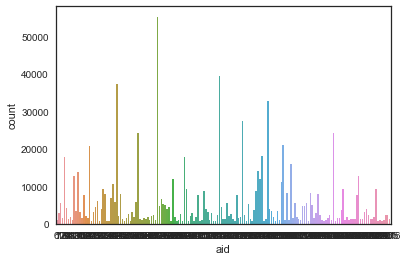

In [14]:
sns.countplot(x='aid', data=X)

接着查看广告商id，提取数据中共有79个广告提供商，6946出现次数最多

In [15]:
X['advertiserId'].value_counts()

6946      76472
915       53728
9106      50668
702       44161
3993      43416
1082      43161
8203      30106
8864      26239
11195     25173
25485     24801
17597     24683
44008     24301
158679    24206
388       23981
370       22330
5552      22214
452       20605
327       19634
11437     18904
47823     18735
133292    18104
11487     17020
6937      15363
83042     12813
18621     12360
8350      12150
79        11068
41806      9316
21359      8265
24704      8161
          ...  
285        2009
149        1891
15174      1891
10122      1830
45705      1774
29704      1747
6841       1740
104071     1690
58643      1614
990        1479
7300       1422
7926       1395
11459      1394
9619       1338
14315      1233
71505      1228
21017      1195
14818      1173
49772      1156
16770      1084
23805      1082
5758       1022
27367       960
9571        864
20943       836
2509        809
22802       794
60          790
7229        689
75748       664
Name: advertiserId, Leng

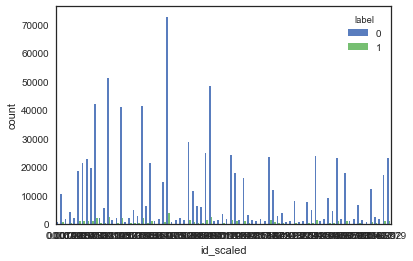

In [94]:
X_combined['id_scaled'] = X_combined['advertiserId']/10000
sns.countplot(x='id_scaled', data=X_combined, hue='label')

下一步查看推广计划id, 共有138个推广计划，其中296367出现次数最多

In [16]:
X['campaignId'].value_counts()

296367    76472
994       41789
63752     40428
163120    37317
40405     31563
19215     25173
51385     24683
100565    24301
643438    24206
50138     20923
18237     18904
464828    18104
111645    17974
5616      17753
12724     17041
186348    15363
90700     14171
50305     13942
280832    12813
18552     12785
310473    12068
31020     11939
295940    10553
662422    10522
37818     10441
233191     9316
745599     9261
741453     8709
209098     8668
361928     8265
          ...  
487541     1156
404        1106
110094     1088
38402      1084
61383      1082
132657     1051
49189      1045
199508     1022
766460     1003
95990       960
734054      944
27030       890
538818      864
445098      836
645468      834
141893      809
59293       799
86429       795
295567      794
358536      793
128701      790
219802      779
475236      761
531344      746
76011       712
134120      701
17378       689
4833        687
131853      671
204378      664
Name: campaignId, Length

In [18]:
X['creativeSize'].value_counts()

35     190185
59     173295
22     139263
53      86822
79      76391
60      65995
100     48616
42      30992
105     17041
91      15930
109     12597
77       8761
95       7114
20       6209
93        671
Name: creativeSize, dtype: int64

接着查看素材和素材大小是否和用户的点击有关, 素材大小共有15种

In [22]:
X['creativeSize'].value_counts()

35     190185
59     173295
22     139263
53      86822
79      76391
60      65995
100     48616
42      30992
105     17041
91      15930
109     12597
77       8761
95       7114
20       6209
93        671
Name: creativeSize, dtype: int64

In [24]:
X_combined = pd.concat([X, y], axis=1) #将标签和特征组合

可以看出广告素材大小在22到60之间用户的点击率是最高的

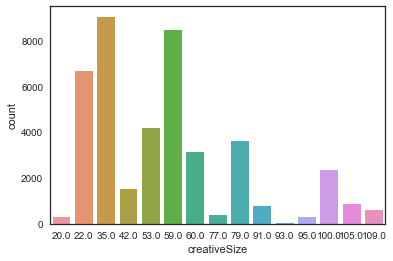

In [95]:
sns.countplot(x='creativeSize', data=X_combined[X_combined['label']==1])

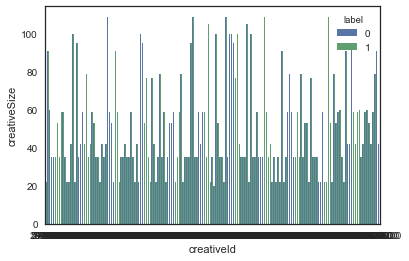

In [28]:
sns.barplot(x='creativeId', y='creativeSize', hue='label', data=X_combined)

然后查看广告类目信息

In [33]:
X['adCategoryId'].value_counts()

21     150423
10     113452
24     105654
27     104969
51      78529
13      46611
4       33016
67      32403
140     25173
74      18104
43      16641
89      16447
142     16272
218     15847
59      15786
70      12813
94      10357
25      10318
1       10257
22       5866
108      5009
282      4404
34       3881
8        3492
100      2988
192      2899
137      2881
77       2355
30       2009
40       1338
265      1233
179      1195
125      1181
9        1156
149      1082
48        864
81        809
204       794
102       710
121       664
Name: adCategoryId, dtype: int64

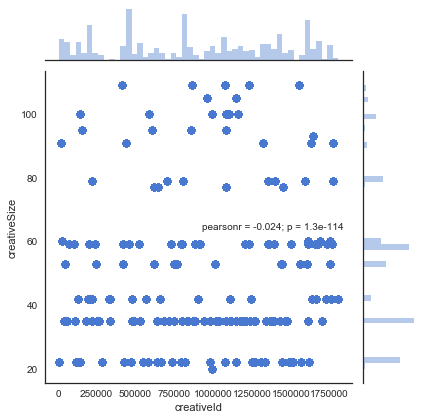

In [65]:
sns.jointplot(x='creativeId', y='creativeSize', data=X)

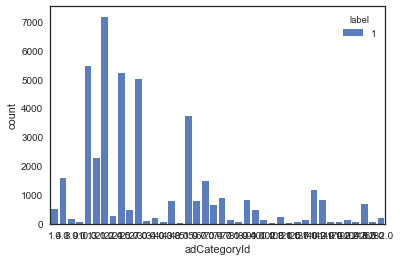

In [96]:
sns.countplot(x='adCategoryId', data=X_combined[X_combined['label']==1], hue='label')

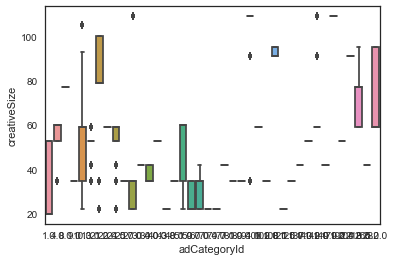

In [97]:
sns.boxplot(x='adCategoryId', y='creativeSize', data=X_combined)

接下来查看推广的商品和用户点击的关系, 提取数据中总共有33中产品，

In [38]:
X['productId'].value_counts()

0        461061
113      117566
3794      76472
19256     40428
15454     24801
4669      23578
5615      20583
3791      15363
7992      13942
25730     12068
27855      9316
4666       6705
12193      6663
1455       6585
439        5958
28986      4573
38         4483
4772       4110
3733       3570
24947      2988
3826       2881
17614      2244
11636      2155
542        2141
70         1891
13727      1479
9760       1084
14314      1082
16791       960
5336        864
1313        809
3194        790
6131        689
Name: productId, dtype: int64

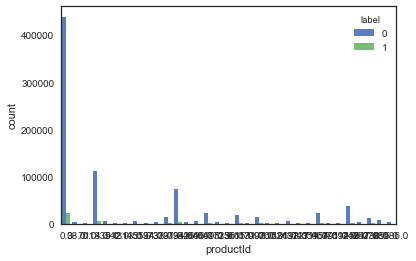

In [61]:
sns.countplot(x='productId', data=X_combined, hue='label')

查看最重要的属性之一，推广商品的类型，总共有4种类型的产品，用户点击情况比较平均，可以考虑加一个属性
每种商品类型的转化人数除以商品出现的总次数，来代表这种产品的转化率

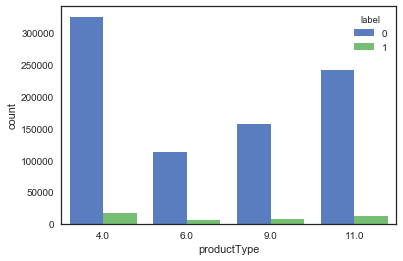

In [63]:
sns.countplot(x='productType', data=X_combined, hue='label')

每种商品转化率计算结果基本一样，说明商品类型对转化率没有直接影响

In [87]:
pro_type = X_combined.groupby(X_combined['productType'])
click_ratio = pro_type.sum()['label'] / pro_type['label'].count()
click_ratio

productType
4.0     0.047859
6.0     0.047335
9.0     0.047592
11.0    0.048611
Name: label, dtype: float64

查看所有特征之间的相关系数

In [71]:
corr = X.corr()
corr

,aid,uid,advertiserId,campaignId,creativeId,creativeSize,adCategoryId,productId,productType,LBS,age,carrier,consumptionAbility,education,gender,house
aid,1.000000,0.001625,0.277521,0.025998,0.307026,-0.042451,0.098115,-0.048243,-0.151655,-0.002409,-0.019990,0.037981,0.042987,0.025435,0.032694,0.022604
uid,0.001625,1.000000,0.000923,0.000859,0.000814,0.001229,-0.000439,-0.001385,-0.001868,0.001602,0.001367,-0.000566,-0.001757,0.000724,-0.000494,-0.002435
advertiserId,0.277521,0.000923,1.000000,0.495009,0.148868,0.002583,-0.016838,-0.092087,-0.372419,-0.005430,0.109812,0.067534,0.043639,0.065102,-0.101659,0.011875
campaignId,0.025998,0.000859,0.495009,1.000000,0.250865,0.000205,-0.141054,-0.103099,-0.207539,-0.002588,0.073543,-0.026287,-0.027418,-0.014804,0.019379,-0.039340
creativeId,0.307026,0.000814,0.148868,0.250865,1.000000,-0.024255,0.063013,-0.123772,-0.239727,0.000666,0.064559,0.069220,0.049846,0.098397,0.072524,0.047808
creativeSize,-0.042451,0.001229,0.002583,0.000205,-0.024255,1.000000,0.000851,-0.162645,-0.262257,-0.011043,0.052184,0.007738,-0.064333,0.065918,-0.156163,0.052784
adCategoryId,0.098115,-0.000439,-0.016838,-0.141054,0.063013,0.000851,1.000000,-0.151390,-0.217472,0.000948,-0.058483,0.017384,0.009403,0.007058,0.127489,0.013235
productId,-0.048243,-0.001385,-0.092087,-0.103099,-0.123772,-0.162645,-0.151390,1.000000,0.541548,0.014798,0.010298,-0.013582,-0.015500,-0.046713,-0.300030,-0.026255
productType,-0.151655,-0.001868,-0.372419,-0.207539,-0.239727,-0.262257,-0.217472,0.541548,1.000000,0.012515,-0.009832,-0.067925,-0.051513,-0.085181,-0.169322,-0.066993
LBS,-0.002409,0.001602,-0.005430,-0.002588,0.000666,-0.011043,0.000948,0.014798,0.012515,1.000000,-0.001868,0.001171,0.018391,0.001120,-0.001541,-0.028529


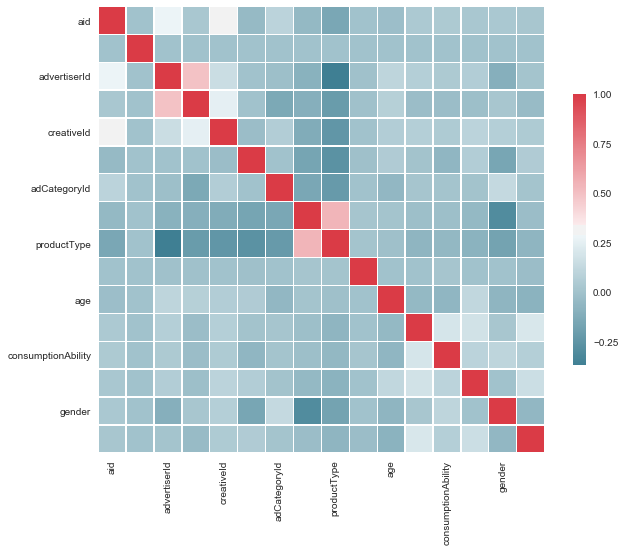

In [72]:
f, ax = plt.subplots(figsize=(10, 10)) 
cmap = sns.diverging_palette(220, 10, as_cmap=True) 
sns.heatmap(corr, cmap=cmap, vmax=1.0, square=True, xticklabels=2, yticklabels=2, linewidths=.3, cbar_kws={"shrink": .5}, ax=ax) 
plt.show()

由于几乎所有数据都是类别型数据，所以常规方法很难分析出特征之间的相互关系